In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import json
from tqdm.auto import tqdm
tqdm.pandas()

/home/data/chensun/affi_project/yes/envs/openwpm/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [18]:
RECORDS_PATH = '../../output/domain_analysis/affiliate/records_sort_by_landing_page.csv'
df = pd.read_csv(RECORDS_PATH)

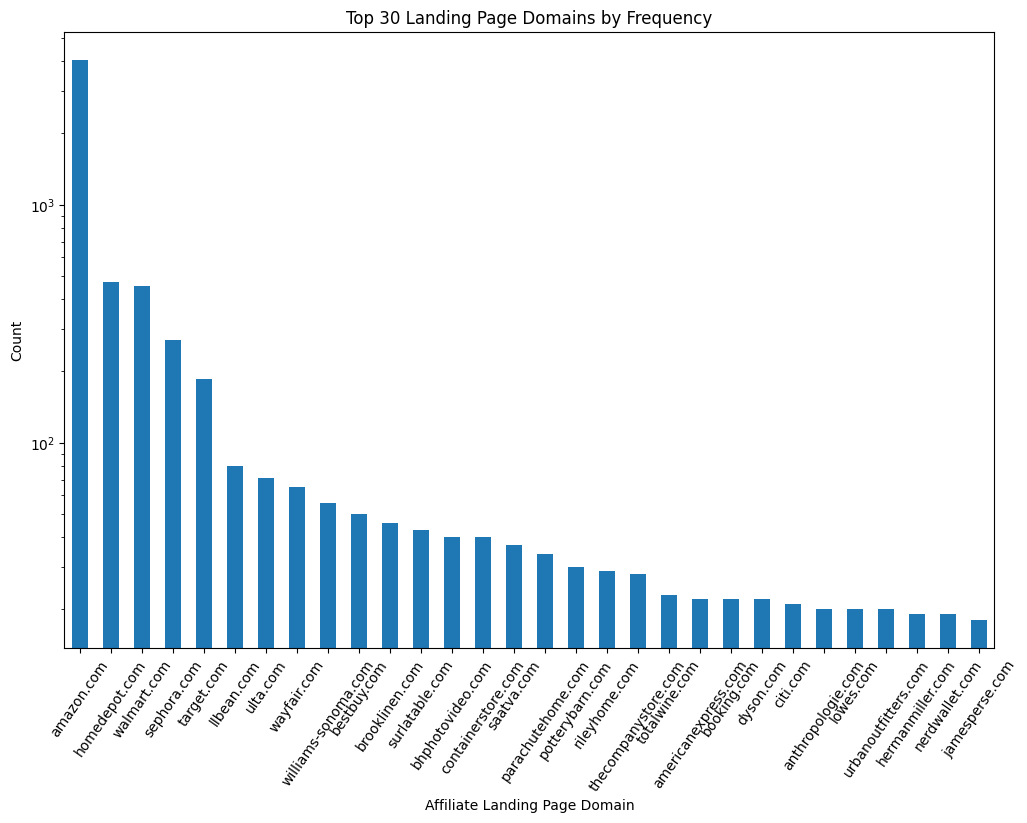

In [19]:
domain_counts = df['landing_page_domain'].value_counts()

# Selecting the top 30 domains
top_30_domains = domain_counts.head(30)

plt.figure(figsize=(12, 8))  # Adjusted for better display of 30 items
top_30_domains.plot(kind='bar')
plt.xlabel('Affiliate Landing Page Domain')
plt.ylabel('Count')
plt.title('Top 30 Landing Page Domains by Frequency')
plt.yscale('log')
plt.xticks(rotation=55)  # Rotate labels for better readability
plt.show()


In [21]:
landing_page_domain = df['landing_page_domain'].nunique()
print(f"Number of unique landing page domains in affiliate links: {landing_page_domain}")

Number of unique landing page domains in affiliate links: 541


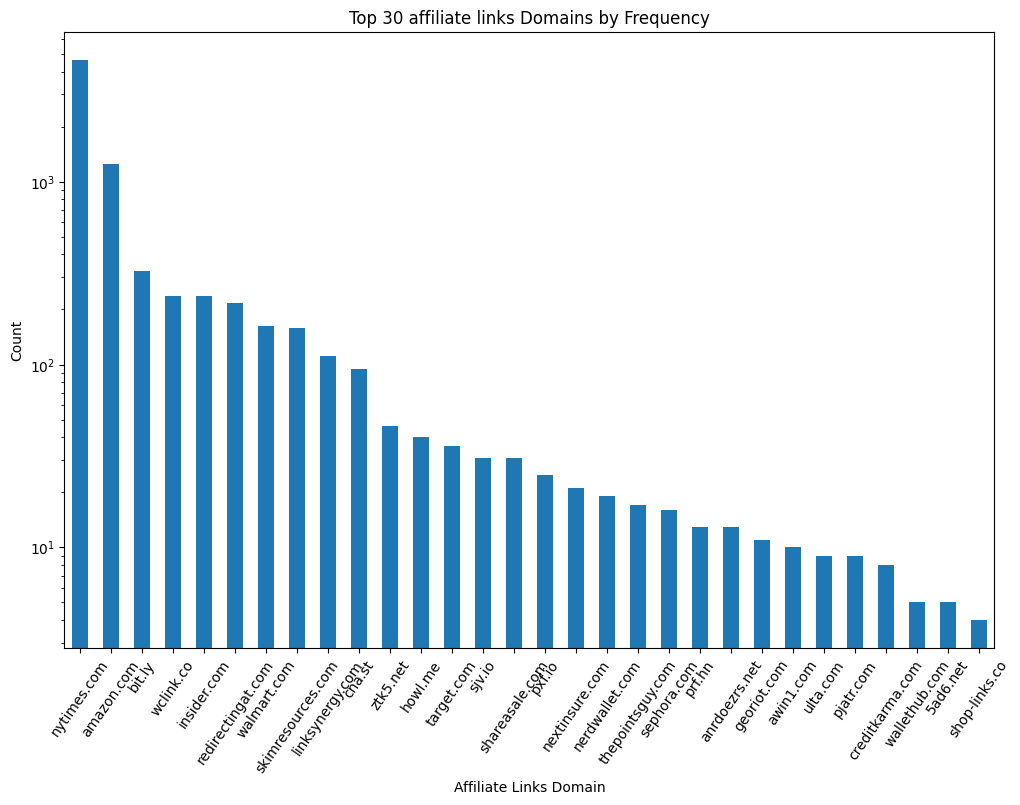

In [31]:
# Assuming df is your DataFrame
# Assuming df is your DataFrame
domain_counts = df['url_domain'].value_counts()

# Selecting the top 30 domains
top_30_domains = domain_counts.head(30)

plt.figure(figsize=(12, 8))  # Adjusted for better display of 30 items
top_30_domains.plot(kind='bar')
plt.xlabel('Affiliate Links Domain')
plt.ylabel('Count')
plt.title('Top 30 affiliate links Domains by Frequency')
plt.yscale('log')
plt.xticks(rotation=55)  # Rotate labels for better readability
plt.show()

In [23]:
url_domain = df['url_domain'].nunique()
print(f"Number of unique url domains in affiliate links: {url_domain}")

Number of unique url domains in affiliate links: 63


In [24]:
AD_RECORDS_PATH = '../../output/domain_analysis/ads/records_sort_by_landing_page.csv'
ad_df = pd.read_csv(AD_RECORDS_PATH)

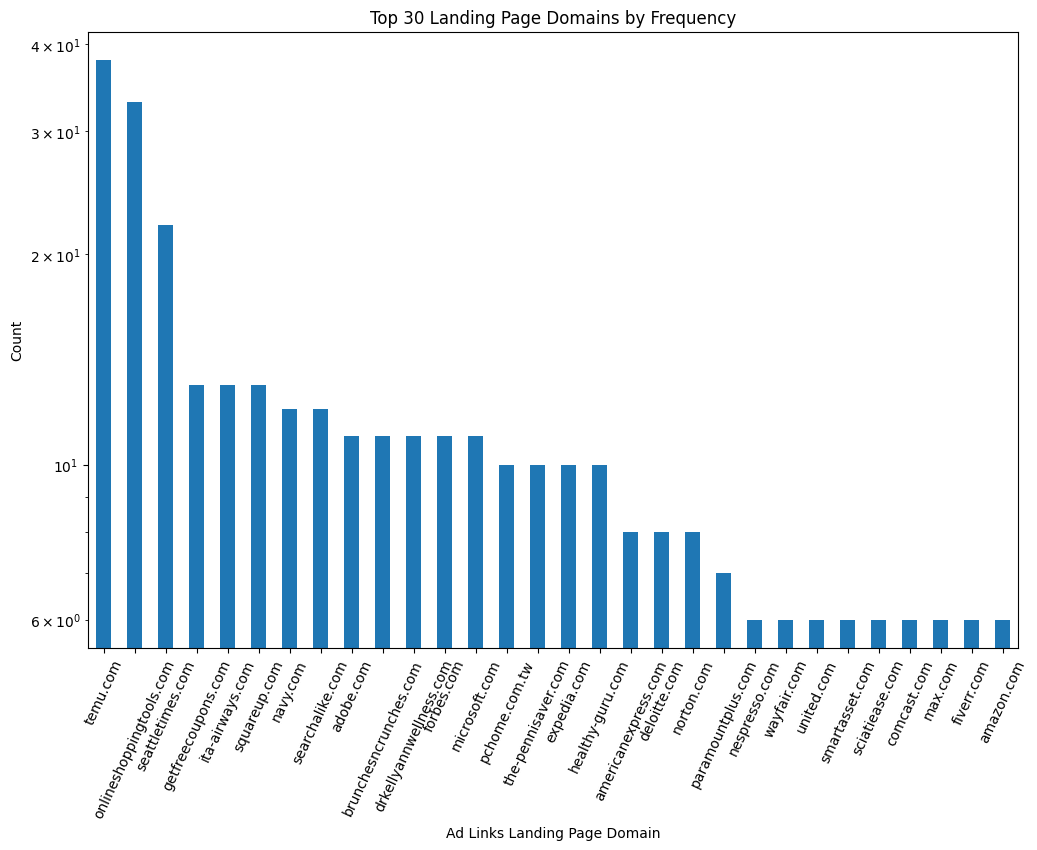

In [27]:
domain_counts = ad_df['landing_page_domain'].value_counts()

# Selecting the top 30 domains
top_30_domains = domain_counts.head(30)

plt.figure(figsize=(12, 8))  # Adjusted for better display of 30 items
top_30_domains.plot(kind='bar')
plt.xlabel('Ad Links Landing Page Domain')
plt.ylabel('Count')
plt.title('Top 30 Landing Page Domains by Frequency')
plt.yscale('log')
plt.xticks(rotation=65)  # Rotate labels for better readability
plt.show()

In [29]:
landing_page_domain = ad_df['landing_page_domain'].nunique()
print(f"Number of unique landing page domains in ad links: {landing_page_domain}")

Number of unique landing page domains in ad links: 259


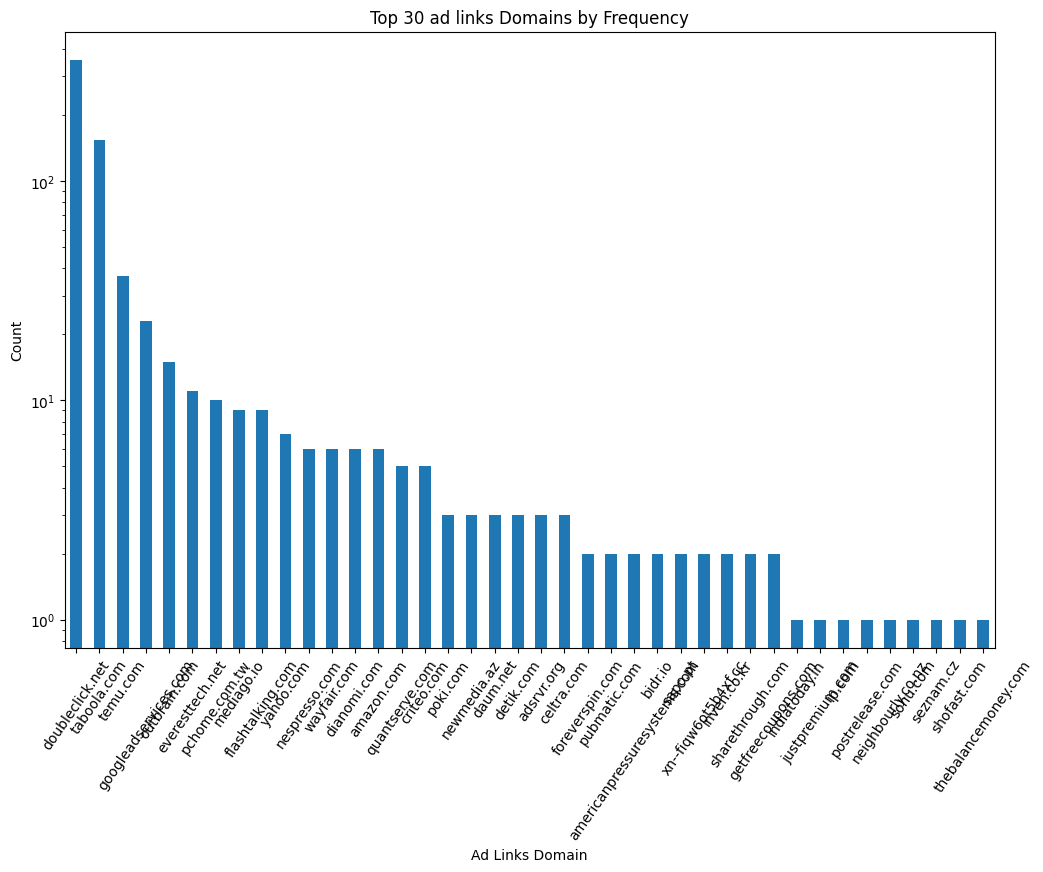

In [36]:
# Assuming df is your DataFrame
# Assuming df is your DataFrame
domain_counts = ad_df['url_domain'].value_counts()

# Selecting the top 30 domains
top_30_domains = domain_counts.head(40)

plt.figure(figsize=(12, 8))  # Adjusted for better display of 30 items
top_30_domains.plot(kind='bar')
plt.xlabel('Ad Links Domain')
plt.ylabel('Count')
plt.title('Top 30 ad links Domains by Frequency')
plt.yscale('log')
plt.xticks(rotation=55)  # Rotate labels for better readability
plt.show()

In [35]:
url_domain = ad_df['url_domain'].nunique()
print(f"Number of unique url domains in ad links: {landing_page_domain}")

Number of unique url domains in ad links: 259
